# CENG313 Introduction to Data Science
## Assignment 2 - Analyzing a Toy Covid Data: Predict Clinical Cases
## Due: January 22 by 11:59pm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Dataset Preparation

#### Loading Data

In [ ]:
#read data from given xls ("COVID19 inpatient cases data.xls") (2nd sheet, not first sheet)
#look the first 5 records of data

#read data from excel in data_reduced sheet
dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/hw2_data_science/COVID19 inpatient cases data.xls', sheet_name='data_reduced')
#create data frame
df=pd.DataFrame(dataset)
#read first 5 row
df.head()

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Clinical outcome,"Hospital stay, days"
0,Male,47,Heavy,15,Y,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,"Aggravated,turn to ICU",NaN
1,Female,53,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,6.0
2,Female,57,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,8.0
3,Male,58,Heavy,1,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,"Aggravated,transfer to superior hospital",NaN
4,Male,54,Ordinary,10,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,5.0


In [ ]:
# check column names, not null count and data types

# list column names
print(list(dataset.columns))

# not null count for columns
print("\nnot null counts:")
print(dataset.notnull().sum())

# data types for columns
print("\ndata types:")
print(dataset.dtypes)

['Gender', 'Age', 'Clinical classification', 'Days from symptoms to hospital', 'No comorbidity', 'Cardiovascular and\ncerebrovascular disease', 'Endocrine system disease', 'Malignant tumor', 'Respiratory system disease', 'Digestive system disease', 'Renal disease', 'Liver disease', 'Fever', 'Cough', 'Chest tightness', 'Fatigue', 'Diarrhea', 'Others', 'Clinical outcome', 'Hospital stay, days']

not null counts:
Gender                                         73
Age                                            73
Clinical classification                        73
Days from symptoms to hospital                 73
No comorbidity                                 73
Cardiovascular and\ncerebrovascular disease    73
Endocrine system disease                       73
Malignant tumor                                73
Respiratory system disease                     73
Digestive system disease                       73
Renal disease                                  73
Liver disease                       

#### Dataset preprocessing

##### Datasets for FIM and Rule extraction

In [ ]:
symptom_cols = ['Fever', 'Cough','Chest tightness', 'Fatigue', 'Diarrhea', 'Others']
# create df_symtoms dataframe including given columns
# add "Covid19" columns assign all entries as "Y"

#create df_symptoms
df_symptoms= df[symptom_cols]
print(df_symptoms)

#add "Covid19" columns
df_symptoms=df_symptoms.assign(Covid19='Y')
print(df_symptoms)


   Fever Cough Chest tightness Fatigue Diarrhea Others
0      Y     Y               Y       Y        Y      N
1      Y     Y               Y       N        N      N
2      Y     Y               N       N        N      N
3      N     N               N       N        N      N
4      Y     Y               Y       N        N      N
..   ...   ...             ...     ...      ...    ...
68     Y     Y               N       N        N      N
69     N     Y               N       Y        N      N
70     N     Y               N       N        N      N
71     Y     Y               N       N        N      N
72     Y     N               Y       N        N      N

[73 rows x 6 columns]
   Fever Cough Chest tightness Fatigue Diarrhea Others Covid19
0      Y     Y               Y       Y        Y      N       Y
1      Y     Y               Y       N        N      N       Y
2      Y     Y               N       N        N      N       Y
3      N     N               N       N        N      N       Y
4 

In [ ]:
disease_cols = ['Cardiovascular and\ncerebrovascular disease', 'Endocrine system disease','Malignant tumor','Respiratory system disease',
                'Digestive system disease','Renal disease','Liver disease']
other_cols= ['Age','Gender']
# create df_diseases dataframe consisting records of given cols(disease_cols and other_cols) from main dataframe
df_diseases= df[disease_cols + other_cols]
print(df_diseases.head())

# add also "Clinicial classification" attribute from main dataframe calling  this column as "Illness" in your df_diseases dataframe
df_diseases['Illness'] = df['Clinical classification']
print(df_diseases.head())

# add " ill" string to all records in "illness" attribute
df_diseases['Illness'] = df_diseases['Illness']+ ' ill'
print(df_diseases.head())


  Cardiovascular and\ncerebrovascular disease Endocrine system disease  \
0                                           N                        N   
1                                           N                        N   
2                                           N                        N   
3                                           N                        Y   
4                                           N                        N   

  Malignant tumor Respiratory system disease Digestive system disease  \
0               N                          N                        N   
1               N                          N                        N   
2               N                          N                        N   
3               N                          N                        N   
4               N                          N                        N   

  Renal disease Liver disease  Age  Gender  
0             N             N   47    Male  
1             N           

<ipython-input-323-bd22e88cb222>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-323-bd22e88cb222>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# categorize ages as "Elderly" (Age>=65),
#                        "Adults" (18<= Age <65),
#                        "Teens" (12=<Age<18),
#                        "Children" (1<Age<11),
#                        "Infants" (Age<=1)
# in new column "Age Group", drop "Age" column in df_disease dataframe.

# create function to scale age
def age_scaler(age):
    if age >= 65:
        return "Elderly"
    elif 18 <= age < 65:
        return "Adults"
    elif 12 <= age < 18:
        return "Teens"
    elif 1 < age < 11:
        return "Children"
    else:
        return "Infants"

# apply age group column
df_diseases["Age Group"] = df_diseases["Age"].apply(age_scaler)
#drop age column
df_diseases.drop("Age", axis=1, inplace=True)

print(df_diseases.head())


  Cardiovascular and\ncerebrovascular disease Endocrine system disease  \
0                                           N                        N   
1                                           N                        N   
2                                           N                        N   
3                                           N                        Y   
4                                           N                        N   

  Malignant tumor Respiratory system disease Digestive system disease  \
0               N                          N                        N   
1               N                          N                        N   
2               N                          N                        N   
3               N                          N                        N   
4               N                          N                        N   

  Renal disease Liver disease  Gender       Illness Age Group  
0             N             N    Male     Heavy ill 

<ipython-input-324-d6d3adf6d13e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-324-d6d3adf6d13e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Convert "Gender", "Illness", "Age Group" attributes to dummies for one-hot encoding, \
#  then drop these attributes from df_diseases

# create dummy for one-hot encoding
df_diseases = pd.get_dummies(df_diseases, columns=["Gender", "Illness", "Age Group"])

print(df_diseases)

   Cardiovascular and\ncerebrovascular disease Endocrine system disease  \
0                                            N                        N   
1                                            N                        N   
2                                            N                        N   
3                                            N                        Y   
4                                            N                        N   
..                                         ...                      ...   
68                                           N                        N   
69                                           N                        Y   
70                                           Y                        N   
71                                           Y                        N   
72                                           Y                        N   

   Malignant tumor Respiratory system disease Digestive system disease  \
0                N       

In [ ]:
# convert all data to bool (True or False) (by replacing or mapping attribute values ) for df_symptoms dataframe

#convert data to bool
df_symptoms.replace({'Y': True, 'N': False}, inplace=True)
print(df_symptoms)

    Fever  Cough  Chest tightness  Fatigue  Diarrhea  Others  Covid19
0    True   True             True     True      True   False     True
1    True   True             True    False     False   False     True
2    True   True            False    False     False   False     True
3   False  False            False    False     False   False     True
4    True   True             True    False     False   False     True
..    ...    ...              ...      ...       ...     ...      ...
68   True   True            False    False     False   False     True
69  False   True            False     True     False   False     True
70  False   True            False    False     False   False     True
71   True   True            False    False     False   False     True
72   True  False             True    False     False   False     True

[73 rows x 7 columns]


In [ ]:
# same for df_diseases dataframe

#convert data to bool
df_diseases.replace({'Y': True, 'N': False}, inplace=True)
print(df_diseases)

    Cardiovascular and\ncerebrovascular disease  Endocrine system disease  \
0                                         False                     False   
1                                         False                     False   
2                                         False                     False   
3                                         False                      True   
4                                         False                     False   
..                                          ...                       ...   
68                                        False                     False   
69                                        False                      True   
70                                         True                     False   
71                                         True                     False   
72                                         True                     False   

    Malignant tumor  Respiratory system disease  Digestive system disease  

In [ ]:
# install mlxtend library
!pip install mlxtend


In [ ]:
import mlxtend


In [ ]:
# create "df_symptoms_extended" concatanating df_symptoms with df_diseases dummy attributes of "Gender", "Illness", "Age Group" and their records.
# drop "Covid19" attribute in extended dataframe

# create df_symptoms_extended
df_symptoms_extended = pd.concat([df_symptoms, df_diseases], axis=1)

# drop Covid19 attribute
df_symptoms_extended.drop('Covid19', axis=1, inplace=True)

print(df_symptoms_extended.head())

   Fever  Cough  Chest tightness  Fatigue  Diarrhea  Others  \
0   True   True             True     True      True   False   
1   True   True             True    False     False   False   
2   True   True            False    False     False   False   
3  False  False            False    False     False   False   
4   True   True             True    False     False   False   

   Cardiovascular and\ncerebrovascular disease  Endocrine system disease  \
0                                        False                     False   
1                                        False                     False   
2                                        False                     False   
3                                        False                      True   
4                                        False                     False   

   Malignant tumor  Respiratory system disease  Digestive system disease  \
0            False                       False                     False   
1           

#### Fill mising values with KNN

The usage of KNNImputer is not allowed.

In [ ]:
# show missing record as (number of missings/total) (should be only "Hospital stay, days")
print(f"number of total Hospital stay, days: {len(df['Hospital stay, days'])}")
print(f"number of missings Hospital stay, days: {df['Hospital stay, days'].isnull().sum()}")

missing_record = (df['Hospital stay, days'].isnull().sum() / len(df['Hospital stay, days'])) * 100
print(f"number of missings/total: {missing_record:.2f}%")


number of total Hospital stay, days: 73
number of missings Hospital stay, days: 4
number of missings/total: 5.48%


In [ ]:
# copy dataframe df1 to df2
df1=df.copy()
df2=df1.copy()

# convert bools and strings to numeric attributes ('Male':1, 'Female':2, 'Heavy':1, 'Ordinary':2, 'Y':1, 'N':0)
convert_to_numeric = {
    'Male': 1,
    'Female': 2,
    'Heavy': 1,
    'Ordinary': 2,
    'Y': 1,
    'N': 0
}

# convert bools and strings to numeric
df2.replace(convert_to_numeric, inplace=True)
df2.head()

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Clinical outcome,"Hospital stay, days"
0,1,47,1,15,1,0,0,0,0,0,0,0,1,1,1,1,1,0,"Aggravated,turn to ICU",NaN
1,2,53,2,13,1,0,0,0,0,0,0,0,1,1,1,0,0,0,Improved and discharge,6.0
2,2,57,2,13,1,0,0,0,0,0,0,0,1,1,0,0,0,0,Improved and discharge,8.0
3,1,58,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"Aggravated,transfer to superior hospital",NaN
4,1,54,2,10,1,0,0,0,0,0,0,0,1,1,1,0,0,0,Improved and discharge,5.0


In [ ]:
# min-max scaling function
def min_max_scale(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        minimum_value  = df[column].min()
        maximum_value  = df[column].max()
        df[column] = (df[column] - minimum_value ) / (maximum_value  - minimum_value )
    return df

# inverse min-max scaling function
def inv_min_max_scale(df, scaled_df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        minimum_value  = df[column].min()
        maximum_value  = df[column].max()
        scaled_df[column] = scaled_df[column] * (maximum_value  - minimum_value ) + minimum_value
    return scaled_df

In [ ]:
# min_max_scale for scaling missing atttribute (you will need for "nan" values)

# scale other nonmissing attributes using MinMaxScaler in sklearn

# fill missing values based on KNeighborsRegressor regression in sklearn (for k=7)

# don't forget to convert original range

# fill df1 missings with given values
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# print original dataframe
print("Original df:")
print(df2.head())

original_df2=df2.copy()

# min-max scale non-missing attributes using the min_max_scale function
df2 = min_max_scale(df2)


# columns to be scaled using MinMaxScaler
columns = df2.select_dtypes(include=['float64', 'int64']).columns

# scale other nonmissing attributes using MinMaxScaler in sklearn
scaler_for_nonmissing = MinMaxScaler()
df2[columns] = scaler_for_nonmissing.fit_transform(df2[columns])


# fill missing values based on KNeighborsRegressor regression in sklearn (for k=7)
def fill_missing_knn_regressor(df, k_neighbors=7):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # create a mask for missing values
        mask_missing_attributes = df[column].isna()

        if mask_missing_attributes.any() and column != 'Clinical outcome':
            # extracting string features for the regression
            X_train = df.loc[~mask_missing_attributes].drop(columns=[column, 'Clinical outcome'])
            y_train = df.loc[~mask_missing_attributes, column]
            knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors)
            knn_regressor.fit(X_train, y_train)

            # prediction
            df.loc[mask_missing_attributes, column] = knn_regressor.predict(df.loc[mask_missing_attributes].drop(columns=[column, 'Clinical outcome']))

    return df


df2 = fill_missing_knn_regressor(df2)

# inverse to the original range
df2 = inv_min_max_scale(original_df2, df2)

# modified df
print("\nUpdated DataFrame:")
print(df2.head())


Original df:
   Gender  Age  Clinical classification  Days from symptoms to hospital  \
0       1   47                        1                              15   
1       2   53                        2                              13   
2       2   57                        2                              13   
3       1   58                        1                               1   
4       1   54                        2                              10   

   No comorbidity  Cardiovascular and\ncerebrovascular disease  \
0               1                                            0   
1               1                                            0   
2               1                                            0   
3               0                                            0   
4               1                                            0   

   Endocrine system disease  Malignant tumor  Respiratory system disease  \
0                         0                0                   

#### Dataset for classification task

In [ ]:
# copy df1 to data_df datafarme
# split data: label attribute 'Clinical classification' as Y, features as X (including nonmissing features)
# convert attribute values to 0 and 1 ('Y':1, 'N':0, 'Male':0, "Female":1)

df = df2.copy()

# splitting data
X = df.drop(columns=['Clinical classification'])
Y = df['Clinical classification']

# converting Y N Male and Female attributes to 0 and 1
conversion_dict = {'Y': 1, 'N': 0, 'Male': 0, 'Female': 1}

df.replace(conversion_dict, inplace=True)

print(df.head())

   Gender   Age  Clinical classification  Days from symptoms to hospital  \
0     1.0  47.0                      1.0                            15.0   
1     2.0  53.0                      2.0                            13.0   
2     2.0  57.0                      2.0                            13.0   
3     1.0  58.0                      1.0                             1.0   
4     1.0  54.0                      2.0                            10.0   

   No comorbidity  Cardiovascular and\ncerebrovascular disease  \
0             1.0                                          0.0   
1             1.0                                          0.0   
2             1.0                                          0.0   
3             0.0                                          0.0   
4             1.0                                          0.0   

   Endocrine system disease  Malignant tumor  Respiratory system disease  \
0                       0.0              0.0                         0

In [ ]:
# Split dataset as train and test set using sklearn (for random_state=44)
# x_train, x_val, y_test, y_test = # to-do

from sklearn.model_selection import train_test_split
X = df.drop(['Clinical outcome'], axis=1)
y = df['Clinical outcome']

# split dataset to train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44)



```
# Bu, kod olarak biçimlendirilmiştir
```

### Classification Part: Predicting Clinical Cases

#### Decision Tree Classifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

# Create ID3 Tree using sklearn
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Predict classes for test data
y_pred = clf.predict(x_test)

# Calculations
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity and Specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Error: {error}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Sensitivity (True Positive Rate): {sensitivity}")
print(f"Specificity (True Negative Rate): {specificity}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Error: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Sensitivity (True Positive Rate): 1.0
Specificity (True Negative Rate): 1.0
Confusion Matrix:
[[ 5  0]
 [ 0 10]]


In [ ]:
# visualize your tree using plot_tree inside sklearn and dtreeplt
# !pip install dtreeplt
!pip install dtreeplt

In [ ]:
!pip install dtreeviz


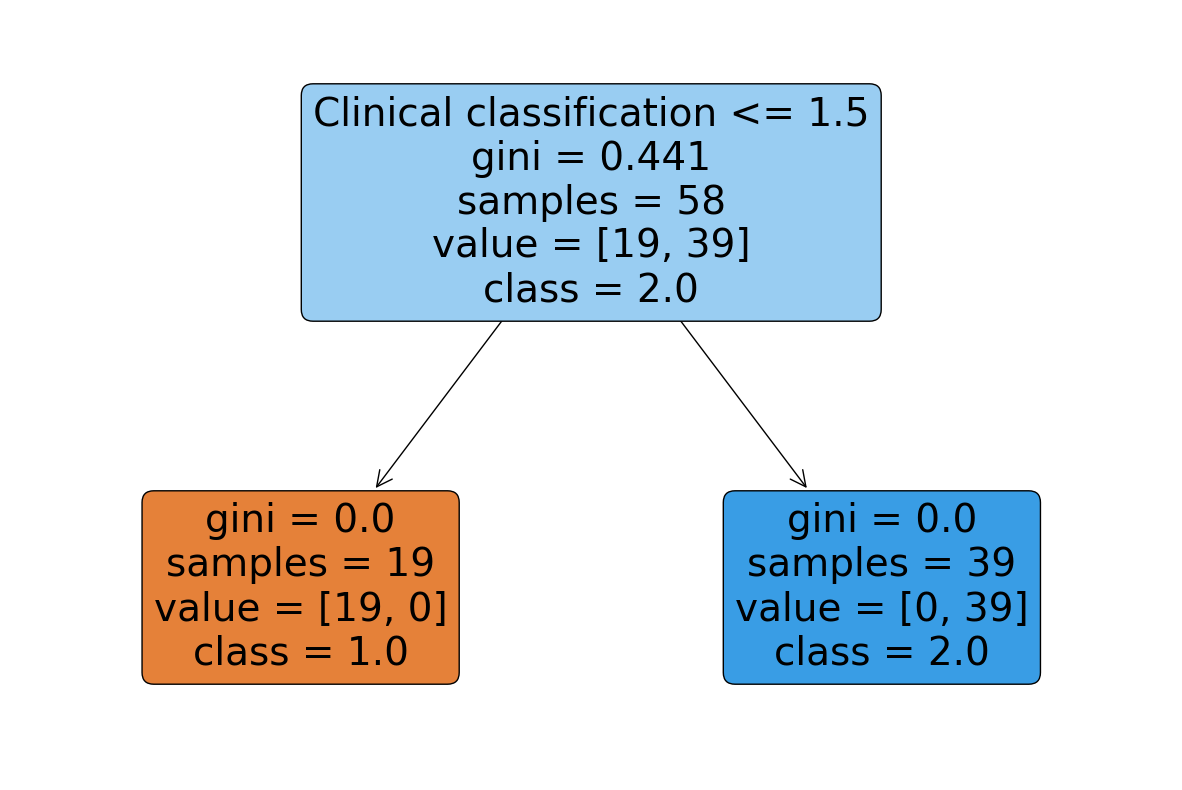

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# convert class names to strings
converted_class_names = [str(class_name) for class_name in clf.classes_]

# Visualize using plot_tree from scikit-learn
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=converted_class_names, rounded=True)
plt.show()



#### KNN Classifier

k=1: Accuracy=0.60, Error=0.40, Recall=0.60, Precision=0.60, F1=0.60
k=2: Accuracy=0.53, Error=0.47, Recall=0.53, Precision=0.60, F1=0.55
k=3: Accuracy=0.67, Error=0.33, Recall=0.67, Precision=0.65, F1=0.66
k=4: Accuracy=0.67, Error=0.33, Recall=0.67, Precision=0.74, F1=0.68
k=5: Accuracy=0.60, Error=0.40, Recall=0.60, Precision=0.56, F1=0.57
k=6: Accuracy=0.67, Error=0.33, Recall=0.67, Precision=0.69, F1=0.67
k=7: Accuracy=0.73, Error=0.27, Recall=0.73, Precision=0.73, F1=0.73
k=8: Accuracy=0.67, Error=0.33, Recall=0.67, Precision=0.69, F1=0.67
k=9: Accuracy=0.67, Error=0.33, Recall=0.67, Precision=0.65, F1=0.66
k=10: Accuracy=0.67, Error=0.33, Recall=0.67, Precision=0.69, F1=0.67


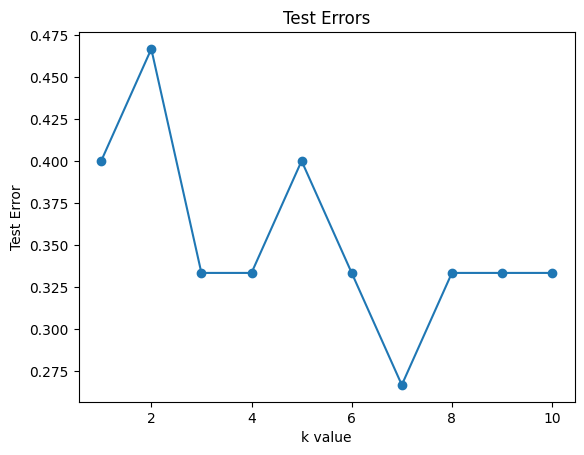

In [ ]:
# classify test data with KNN classifier of sklearn (for each possible k value)

# calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure, confusion matrix
#           based on your defined functions (using k=7)

# plot test errors for each k

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix


# test k from 1 to 10
k_values = list(range(1, 11))

# lists
accuracy_values = []
error_values = []
recall_values = []
precision_values = []
f1_values = []

# Classify test data with KNN for each k value
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)

    # calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # add to arrays
    accuracy_values.append(accuracy)
    error_values.append(1 - accuracy)
    recall_values.append(recall)
    precision_values.append(precision)
    f1_values.append(f1)

    print(f"k={k}: Accuracy={accuracy:.2f}, Error={1 - accuracy:.2f}, Recall={recall:.2f}, Precision={precision:.2f}, F1={f1:.2f}")

# Plot test errors for each k
plt.plot(k_values, error_values, marker='o')
plt.title('Test Errors')
plt.xlabel('k value')
plt.ylabel('Test Error')
plt.show()


### Evaluation Part: Decision Boundries, ROC Curves, Performance Comparisons

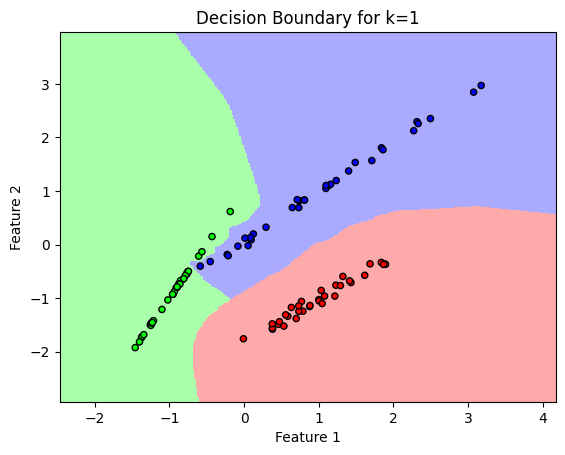

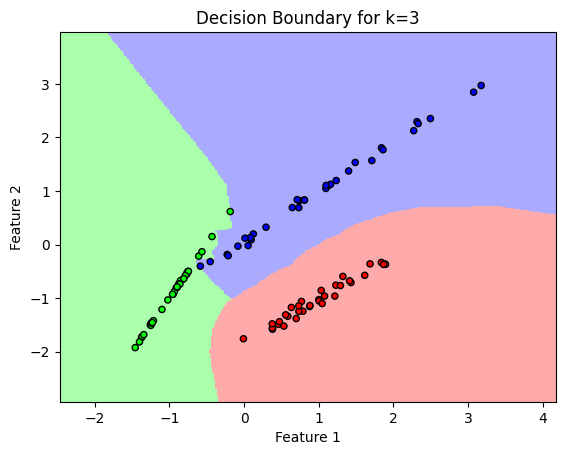

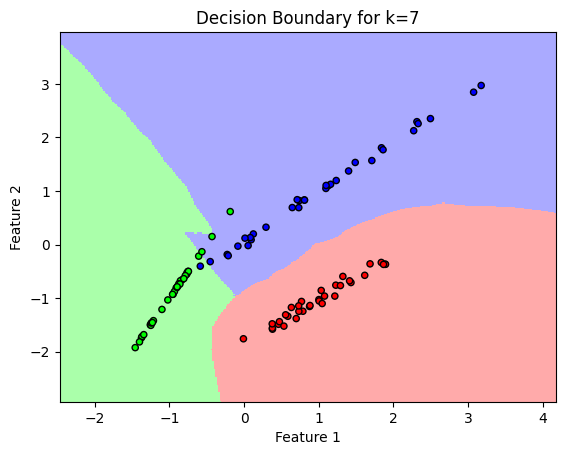

In [ ]:
# show decision boundaries for each classifiers on same plot (show pairwise since we have more than 2 attiributes)
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Create a 2D dataset for illustration purposes
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=42)

# Define colormap for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

# Create meshgrid for decision boundary plotting
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Assuming df2 is your DataFrame with features X and label Y
for k in [1, 3, 7]:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X, y)
    Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(f'Decision Boundary for k={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.show()



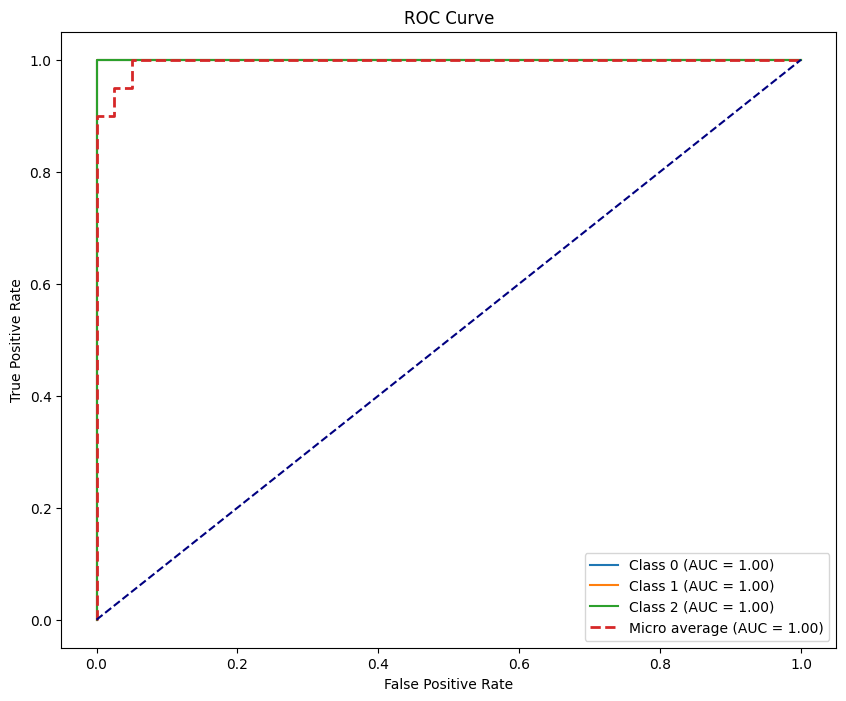

In [ ]:
# draw ROC curves for each classifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Assuming df2 is your DataFrame with features X and label Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)

# Binarize the output
y_train_binarize = label_binarize(y_train, classes=[0, 1, 2])
y_test_binarize = label_binarize(y_test, classes=[0, 1, 2])

# Train the model and predict probabilities
classifier = OneVsRestClassifier(knn_classifier)
y_score = classifier.fit(X_train, y_train_binarize).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve , ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarize.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10, 8))

for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label=f'Micro average (AUC = {roc_auc["micro"]:.2f})', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# show classification results based on all measures (acc,err,recall, specifity, etc.) inside a table.
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=7)

# train the model
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Print classification results
classification_results = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_results)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.88      0.93         8
           2       0.80      1.00      0.89         4

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20

